Gradient Descent Assignment

Import functions:

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Defining the three vectors

In [30]:
s = np.array([95, 31])
r = np.array([35, 39])
m = np.array([3, 11])


Defining distance function between two vectors

In [31]:
def dist(v, w):
    return np.log(3 + 3 * (v[0] - w[0])**2 + 1.5 * (v[1] - w[1])**2)

Defining overall difference function from new input vector x

In [32]:
def diff(x):
    return dist(r, x) + dist(s, x) + dist(m, x)

Test that the distance between a vector and itself is log(3)

In [33]:
distance_r_r = dist(r, r)
distance_s_s = dist(s, s)
distance_m_m = dist(m, m)

print("Log 3: ", np.log(3))
print("Distance between r and r:", distance_r_r)
print("Distance between s and s:", distance_s_s)
print("Distance between m and m:", distance_m_m)

Log 3:  1.0986122886681098
Distance between r and r: 1.0986122886681098
Distance between s and s: 1.0986122886681098
Distance between m and m: 1.0986122886681098


Step 1: Test the overall difference function for a new input vector

In [34]:
x = np.array([2.0, 3.0])  # Example new input vector
overall_difference = diff(x)

print("Overall difference for x:", overall_difference)


Overall difference for x: 23.392323364300378


Step 2: Compute Diff(x) for 20 random points and compute statistics

In [35]:
random_points = np.random.rand(20, 2) * 100  # Generate 20 random points in the range [0, 100]
diff_values = [diff(point) for point in random_points]

average_diff = np.mean(diff_values)
min_diff = np.min(diff_values)
max_diff = np.max(diff_values)

print("\nAverage Diff(x) for 20 random points:", average_diff)
print("Lowest Diff(x):", min_diff)
print("Highest Diff(x):", max_diff)



Average Diff(x) for 20 random points: 25.12632132426382
Lowest Diff(x): 22.926650535183544
Highest Diff(x): 26.811729226701793


The average difference to 4 most significant bits is 25.13 while the lowest is 22.93 and the highest is 26.81. This indicates that a random search is not an optimal method of finding a minima as it does not use the landscape of the function to its advantage. There also might be a chance that the random search maybe be stuck in a local minima instead of a function wide or global minima.

Step 7: Compute Diff(50, 50)

In [36]:
xzero = np.array([50.0, 50.0])
diff_xzero = diff(xzero)
print("\nDiff(50, 50):", diff_xzero)


Diff(50, 50): 24.64922379866452


Step 8: Create a function to compute the gradient of Diff

In [37]:
def gradient(f, x, delta=0.001):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_delta = np.copy(x)
        x_delta[i] += delta
        grad[i] = (f(x_delta) - f(x)) / delta
    return grad

Step 9: Compute the gradient at (0, 0), (100, 0), (0, 100), and (100, 100)

In [38]:
points_to_check = [np.array([0.0, 0.0]), np.array([100.0, 0.0]),
                   np.array([0.0, 100.0]), np.array([100.0, 100.0])]

print("\nGradients at different points:")
for point in points_to_check:
    grad = gradient(diff, point)
    print(f"Gradient at {point}: {grad}")


Gradients at different points:
Gradient at [0. 0.]: [-0.14032021 -0.17892679]
Gradient at [100.   0.]: [ 0.06629993 -0.07018773]
Gradient at [  0. 100.]: [-0.04084746  0.04822785]
Gradient at [100. 100.]: [0.04002402 0.04535082]


In [50]:
gradient_at_xzero = gradient(diff, xzero)
print("\nGradient at (50, 50):", gradient_at_xzero)

# Check that the gradient points away from (50, 50)
# Vector pointing from the fixed vectors towards (50, 50)
vectors = [r, s, m]
for vec in vectors:
    to_xzero = xzero - vec
    # Check the dot product
    dot_product = np.dot(gradient_at_xzero, to_xzero)
    print(f"Vector from {vec} to (50, 50): {to_xzero}, Dot product: {dot_product}")
    if dot_product < 0:
        print("Gradient points away from (50, 50) for this vector.")
    else:
        print("Gradient does not point away from (50, 50) for this vector.")


Gradient at (50, 50): [0.09556543 0.06013572]
Vector from [35 39] to (50, 50): [15. 11.], Dot product: 2.0949744085143607
Gradient does not point away from (50, 50) for this vector.
Vector from [95 31] to (50, 50): [-45.  19.], Dot product: -3.157865773623314
Gradient points away from (50, 50) for this vector.
Vector from [ 3 11] to (50, 50): [47. 39.], Dot product: 6.836868411717489
Gradient does not point away from (50, 50) for this vector.


Step 10: Create a function to perform gradient descent

In [51]:
def gradient_descent(f, x_init, stepsize=1.0, num_steps=100):
    x = np.copy(x_init)
    for i in range(num_steps):
        grad = gradient(f, x)
        x = x - stepsize * grad
        if (i + 1) % 5 == 0:
            print(f"Step {i + 1}: x = {x}, Diff(x) = {f(x)}")
        if np.linalg.norm(grad) < 1e-6:
            break
    return x

Step 11: Perform gradient descent from (50, 50)

In [47]:
print("\nGradient descent from (50, 50):")
gradient_descent(diff, np.array([50.0, 50.0]))


Gradient descent from (50, 50):
Step 5: x = [49.51470729 49.69687094], Diff(x) = 24.583515283373913
Step 10: x = [49.00973955 49.38708375], Diff(x) = 24.51306068934018
Step 15: x = [48.48321726 49.0696326 ], Diff(x) = 24.437157415998918
Step 20: x = [47.93293018 48.74330494], Diff(x) = 24.354942884630432
Step 25: x = [47.35624775 48.40661842], Diff(x) = 24.265341954154266
Step 30: x = [46.74999564 48.05773147], Diff(x) = 24.166990846347616
Step 35: x = [46.11028151 47.69431244], Diff(x) = 24.058123792761123
Step 40: x = [45.43224184 47.31334212], Diff(x) = 23.93639818244442
Step 45: x = [44.70966136 46.91080341], Diff(x) = 23.79861347341444
Step 50: x = [43.9343775  46.48117008], Diff(x) = 23.64023610790663
Step 55: x = [43.09530102 46.01651338], Diff(x) = 23.45454509399643
Step 60: x = [42.17670376 45.50481861], Diff(x) = 23.230968828307248
Step 65: x = [41.15498297 44.92648309], Diff(x) = 22.95149086036265
Step 70: x = [39.9919009  44.24595609], Diff(x) = 22.58166984084067
Step 75: 

array([35.01113517, 38.97751249])

Here the minima was found of 18.75 at the point (35.01,38.98). This was a gradient descent from (50,50). If you scale back by a factor of 100 the point will be (0.35,0.39).

Step 12: Repeat gradient descent from (0, 0) and (100, 100)

In [48]:
print("\nGradient descent from (0, 0):")
gradient_descent(diff, np.array([0.0, 0.0]))
print("\nGradient descent from (100, 100):")
gradient_descent(diff, np.array([100.0, 100.0]))


Gradient descent from (0, 0):
Step 5: x = [0.69613311 0.93465927], Diff(x) = 24.03175562252012
Step 10: x = [1.37089764 1.98563096], Diff(x) = 23.717049342182047
Step 15: x = [2.00604063 3.19019101], Diff(x) = 23.34184769310309
Step 20: x = [2.57043626 4.61203701], Diff(x) = 22.865757522865465
Step 25: x = [3.00431073 6.38276126], Diff(x) = 22.18103102413008
Step 30: x = [3.1588976  8.88179604], Diff(x) = 20.84096870592157
Step 35: x = [ 3.02511799 11.02163641], Diff(x) = 19.617899905933776
Step 40: x = [ 3.04012841 11.02160231], Diff(x) = 19.61788055026889
Step 45: x = [ 3.02571148 11.02163689], Diff(x) = 19.61789061283825
Step 50: x = [ 3.03955736 11.02160351], Diff(x) = 19.617873076855517
Step 55: x = [ 3.02625789 11.02163541], Diff(x) = 19.617882679150892
Step 60: x = [ 3.0390316  11.02160461], Diff(x) = 19.61786676979395
Step 65: x = [ 3.02676117 11.02163406], Diff(x) = 19.617875898429215
Step 70: x = [ 3.03854734 11.02160565], Diff(x) = 19.617861447053908
Step 75: x = [ 3.027224

array([96.03302953, 95.30663081])

Here the minima was found of 19.62 at the point (3.04,11.02). This was a gradient descent from (0,0). If you scale back by a factor of 100 the point will be (0.35,0.39).

A minima was also found with a gradient descent from (100,100) of 28.91 at the point (96.03,28.92). If you scale back by a factor of 100 the point will be (0.35,0.39).

Step 13: Create a plot of the Diff function

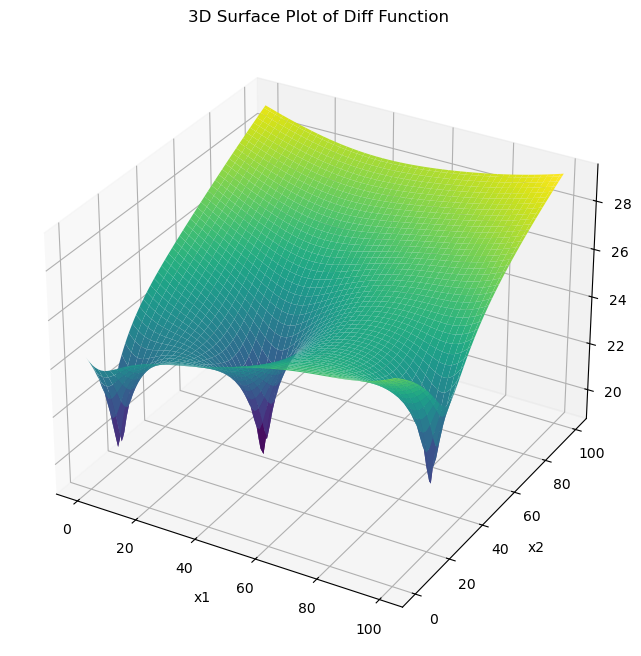

In [52]:
x_vals = np.linspace(0, 100, 100)
y_vals = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[diff(np.array([x, y])) for x in x_vals] for y in y_vals])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axis
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')  # Surface plot
ax.set_title('3D Surface Plot of Diff Function')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Diff(x)')
plt.show()

Looking at this graph there are 3 minima expected and from the results of the gradient descent only 2 were found. 


Step 14: Show the gradient field on top of the contour plot

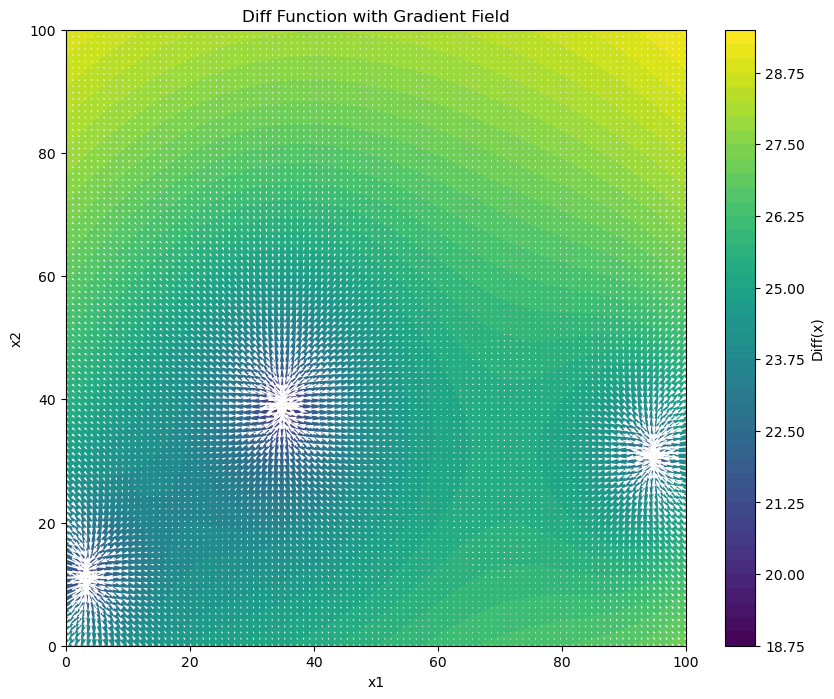

In [43]:
grad_x = np.zeros_like(X)
grad_y = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        grad = gradient(diff, np.array([X[i, j], Y[i, j]]))
        grad_x[i, j] = grad[0]
        grad_y[i, j] = grad[1]

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Diff(x)')
plt.quiver(X, Y, -grad_x, -grad_y, color='white')
plt.title('Diff Function with Gradient Field')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()